# Clustering Techniques: K-Means vs. DBSCAN
This notebook demonstrates the application of K-Means and DBSCAN clustering on synthetic datasets. We will use the moons and blobs datasets to explore the strengths and weaknesses of these clustering algorithms.

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings("ignore")

## Generate Synthetic Datasets
We will create two datasets: 
- **Moons:** Two crescent-shaped clusters with added noise.
- **Blobs:** Three spherical clusters with specified variance.

In [5]:
# Create synthetic datasets
X_moons, _ = make_moons(n_samples=300, noise=0.1, random_state=42)
X_blobs, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

## Apply K-Means Clustering
K-Means is applied to both datasets. The number of clusters (\(k\)) is pre-specified based on dataset characteristics.

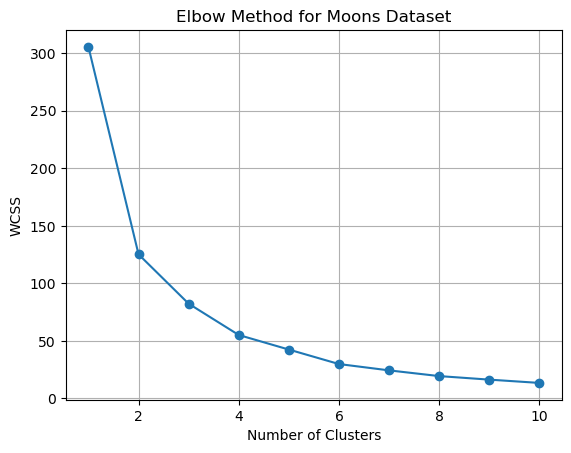

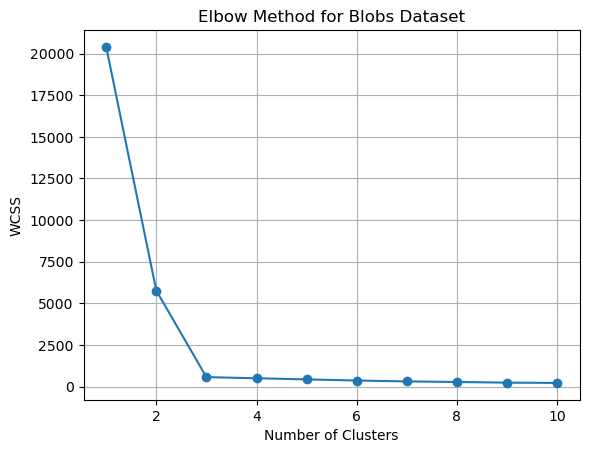

In [23]:
# Elbow method for selecting the number of clusters
def calculate_wcss(data):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)
    return wcss

# Calculate and plot WCSS for moons dataset
wcss_moons = calculate_wcss(X_moons)
plt.plot(range(1, 11), wcss_moons, marker='o')
plt.title('Elbow Method for Moons Dataset')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# Calculate and plot WCSS for blobs dataset
wcss_blobs = calculate_wcss(X_blobs)
plt.plot(range(1, 11), wcss_blobs, marker='o')
plt.title('Elbow Method for Blobs Dataset')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()


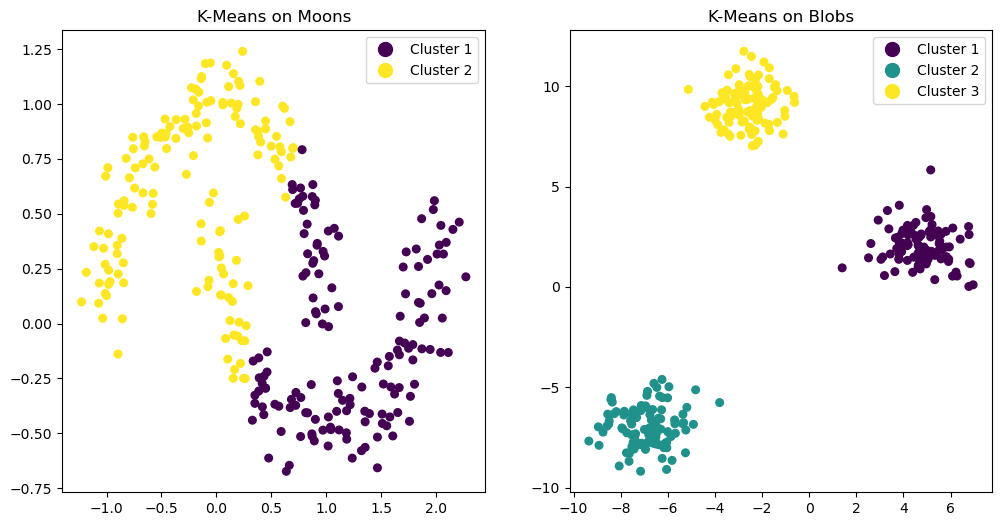

In [25]:
# K-Means clustering
kmeans_moons = KMeans(n_clusters=2, random_state=42)
labels_kmeans_moons = kmeans_moons.fit_predict(X_moons)

kmeans_blobs = KMeans(n_clusters=3, random_state=42)
labels_kmeans_blobs = kmeans_blobs.fit_predict(X_blobs)

# Plot K-Means results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Moons Dataset
scatter_moons = ax[0].scatter(X_moons[:, 0], X_moons[:, 1], c=labels_kmeans_moons, cmap='viridis', s=30)
ax[0].set_title('K-Means on Moons')
legend_labels_moons = ['Cluster 1', 'Cluster 2']
handles_moons = [plt.Line2D([0], [0], marker='o', color=scatter_moons.cmap(scatter_moons.norm(i)), 
                            linestyle='', markersize=10) for i in range(len(legend_labels_moons))]
ax[0].legend(handles_moons, legend_labels_moons, loc='best')

# Blobs Dataset
scatter_blobs = ax[1].scatter(X_blobs[:, 0], X_blobs[:, 1], c=labels_kmeans_blobs, cmap='viridis', s=30)
ax[1].set_title('K-Means on Blobs')
legend_labels_blobs = ['Cluster 1', 'Cluster 2', 'Cluster 3']
handles_blobs = [plt.Line2D([0], [0], marker='o', color=scatter_blobs.cmap(scatter_blobs.norm(i)), 
                            linestyle='', markersize=10) for i in range(len(legend_labels_blobs))]
ax[1].legend(handles_blobs, legend_labels_blobs, loc='best')

plt.show()


## Apply DBSCAN Clustering
DBSCAN is applied to the datasets with parameters chosen based on dataset densities (\(\epsilon\) and \(minPts\)).

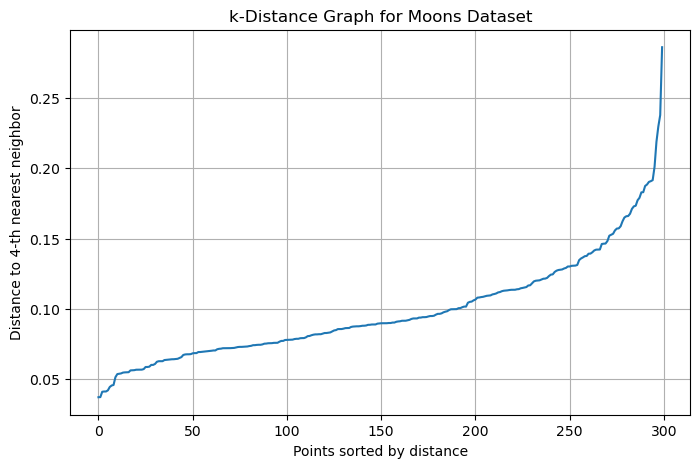

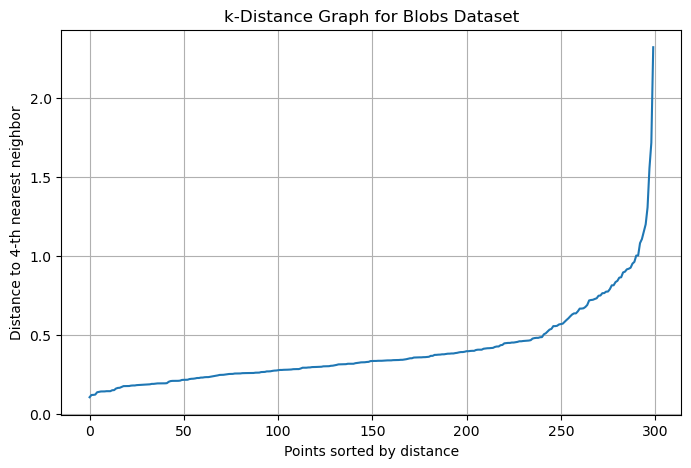

In [10]:
# Function to plot k-distance graph
def plot_k_distance(X, k, dataset_name):
    neigh = NearestNeighbors(n_neighbors=k)
    neigh.fit(X)
    distances, indices = neigh.kneighbors(X)

    # Sort distances to k-th nearest neighbor
    sorted_distances = np.sort(distances[:, k - 1])

    # Plot the k-distance graph
    plt.figure(figsize=(8, 5))
    plt.plot(sorted_distances)
    plt.title(f'k-Distance Graph for {dataset_name}')
    plt.xlabel('Points sorted by distance')
    plt.ylabel(f'Distance to {k}-th nearest neighbor')
    plt.grid()
    plt.show()

# Set minPts to 4 (commonly used default, adjust as needed)
k = 4

# Plot k-distance graphs for moons and blobs datasets
plot_k_distance(X_moons, k, "Moons Dataset")
plot_k_distance(X_blobs, k, "Blobs Dataset")


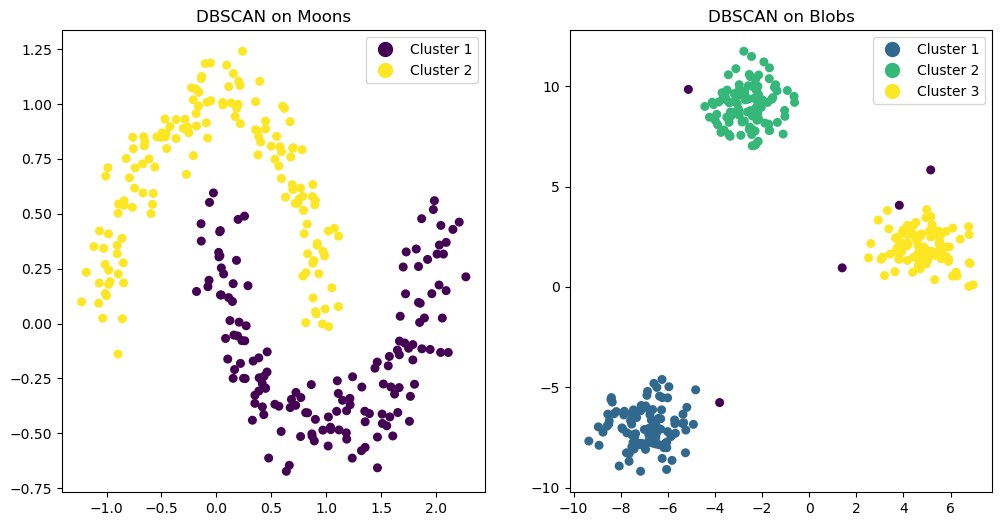

In [29]:
# DBSCAN clustering
dbscan_moons = DBSCAN(eps=0.2, min_samples=5)
labels_dbscan_moons = dbscan_moons.fit_predict(X_moons)

dbscan_blobs = DBSCAN(eps=1.0, min_samples=5)
labels_dbscan_blobs = dbscan_blobs.fit_predict(X_blobs)

# Plot DBSCAN results
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Moons Dataset
scatter_moons = ax[0].scatter(X_moons[:, 0], X_moons[:, 1], c=labels_dbscan_moons, cmap='viridis', s=30)
ax[0].set_title('DBSCAN on Moons')
legend_labels_moons = ['Cluster 1', 'Cluster 2', 'Noise']
handles_moons = [
    plt.Line2D([0], [0], marker='o', color=scatter_moons.cmap(scatter_moons.norm(i)), 
               linestyle='', markersize=10) for i in range(len(set(labels_dbscan_moons)))
]
ax[0].legend(handles_moons, legend_labels_moons, loc='best')

# Blobs Dataset
scatter_blobs = ax[1].scatter(X_blobs[:, 0], X_blobs[:, 1], c=labels_dbscan_blobs, cmap='viridis', s=30)
ax[1].set_title('DBSCAN on Blobs')
legend_labels_blobs = ['Cluster 1', 'Cluster 2', 'Cluster 3']
handles_blobs = [
    plt.Line2D([0], [0], marker='o', color=scatter_blobs.cmap(scatter_blobs.norm(i)), 
               linestyle='', markersize=10) for i in range(len(set(labels_dbscan_blobs)))
]
ax[1].legend(handles_blobs, legend_labels_blobs, loc='best')

plt.show()


## Compare Clustering Performance
We calculate the silhouette score for each clustering method to evaluate cluster quality.

In [13]:

# Calculate silhouette scores
silhouette_kmeans_moons = silhouette_score(X_moons, labels_kmeans_moons)
silhouette_dbscan_moons = silhouette_score(X_moons, labels_dbscan_moons)

silhouette_kmeans_blobs = silhouette_score(X_blobs, labels_kmeans_blobs)
silhouette_dbscan_blobs = silhouette_score(X_blobs, labels_dbscan_blobs)

print(f'Silhouette Score (K-Means on Moons): {silhouette_kmeans_moons:.2f}')
print(f'Silhouette Score (DBSCAN on Moons): {silhouette_dbscan_moons:.2f}')
print(f'Silhouette Score (K-Means on Blobs): {silhouette_kmeans_blobs:.2f}')
print(f'Silhouette Score (DBSCAN on Blobs): {silhouette_dbscan_blobs:.2f}')


Silhouette Score (K-Means on Moons): 0.48
Silhouette Score (DBSCAN on Moons): 0.32
Silhouette Score (K-Means on Blobs): 0.85
Silhouette Score (DBSCAN on Blobs): 0.79


## Conclusion
K-Means works well with spherical clusters but struggles with non-spherical shapes. DBSCAN handles arbitrary cluster shapes and noise effectively but requires careful parameter tuning. Understanding these algorithms' strengths and weaknesses is key to selecting the right clustering method.